### Import and read excel file 
- 0.a)

In [2]:
import pandas as pd


file_path_riket = ("../Labb2/riket2023_åk9_np.xlsx")

# Read the different sheets from the Excel file, skipping the first 8 rows, and store it in a DataFrame.
df_riket_engelska = pd.read_excel(file_path_riket, sheet_name='Engelska', skiprows=8)
df_riket_matematik = pd.read_excel(file_path_riket, sheet_name='Matematik', skiprows=8)
df_riket_svenska = pd.read_excel(file_path_riket, sheet_name='Svenska', skiprows=8)
df_riket_andra_språk = pd.read_excel(file_path_riket, sheet_name='Svenska som andraspråk', skiprows=8)



## Name change columns

- 0.a)

In [3]:
# Changing names on columns
df_riket_engelska.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']
df_riket_matematik.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']
df_riket_svenska.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']
df_riket_andra_språk.columns = ['Plats', 'Huvudman', 'Totalt (A-F)', 'Flickor (A-F)', ' Pojkar (A-F)', 'Totalt (A-E)', 'Flickor (A-E)', 'Pojkar (A-E)', 'Totalt (Poäng)', 'Flickor (Poäng)', 'Pojkar (Poäng)']

df_riket_matematik

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


### F in mathematics 

- 0.b)


In [4]:
# Copy the dataFrame to a new dataFrame for F grade calculations
df_f_math = df_riket_matematik.copy()

# Clean the column names by removing spaces
df_f_math.columns = [col.strip() for col in df_f_math.columns]

# Make selected columns numeric, turn errors into NaN
columns_to_convert = ['Flickor (A-F)', 'Pojkar (A-F)', 'Flickor (A-E)', 'Pojkar (A-E)']
for column in columns_to_convert:
    df_f_math[column] = pd.to_numeric(df_f_math[column], errors='coerce')

# Calculate the number of girls with F grades by subtracting the estimated number of girls with A-E from the total.
df_f_math['Flickor (F)'] = df_f_math['Flickor (A-F)'] - (df_f_math['Flickor (A-F)'] * (df_f_math['Flickor (A-E)'] / 100)).round()
df_f_math['Pojkar (F)'] = df_f_math['Pojkar (A-F)'] - (df_f_math['Pojkar (A-F)'] * (df_f_math['Pojkar (A-E)'] / 100)).round()
# Sum the F grades for girls and boys to get the total number of students with F grades.
df_f_math['Totalt (F)'] = df_f_math['Flickor (F)'] + df_f_math['Pojkar (F)']

df_f_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng),Flickor (F),Pojkar (F),Totalt (F)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0,5825.0,5798.0,11623.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7,4967.0,5034.0,10001.0
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1,869.0,742.0,1611.0
3,Riket,Skolverket,50,25,25,~100,NaN,NaN,14.1,13.5,14.7,NaN,NaN,NaN


## Barplot total points

- 0.c)
- 


In [49]:
import matplotlib.pyplot as plt

## Data cleaning and preparing data for plotting

# Converts the total points from different subjects into lists for plotting
math_total = df_riket_matematik['Totalt (Poäng)'].tolist()  
english_total = df_riket_engelska['Totalt (Poäng)'].tolist()  
swedish_total = df_riket_svenska['Totalt (Poäng)'].tolist()  
other_lang_total = df_riket_andra_språk['Totalt (Poäng)'].tolist()

# Create a new DataFrame combining all subjects
combined_df = pd.DataFrame({'Matte':math_total, 'Engelska': english_total, 'Svenska': swedish_total, 'Svenska som andraspråk': other_lang_total})

# Make a clean copy of the combined DataFrame
combined_cleaned = pd.DataFrame(combined_df)

# Converts 'svenska som andraspråk' to numeric, changing errors to NaN
combined_cleaned['Svenska som andraspråk'] = pd.to_numeric(combined_cleaned['Svenska som andraspråk'], errors='coerce')




,Matte,Engelska,Svenska,Svenska som andraspråk
0,11.9,15.7,13.6,9.4
1,11.6,15.4,13.3,9.0
2,13.0,16.9,14.4,11.1
3,14.1,18.5,15.0,NaN


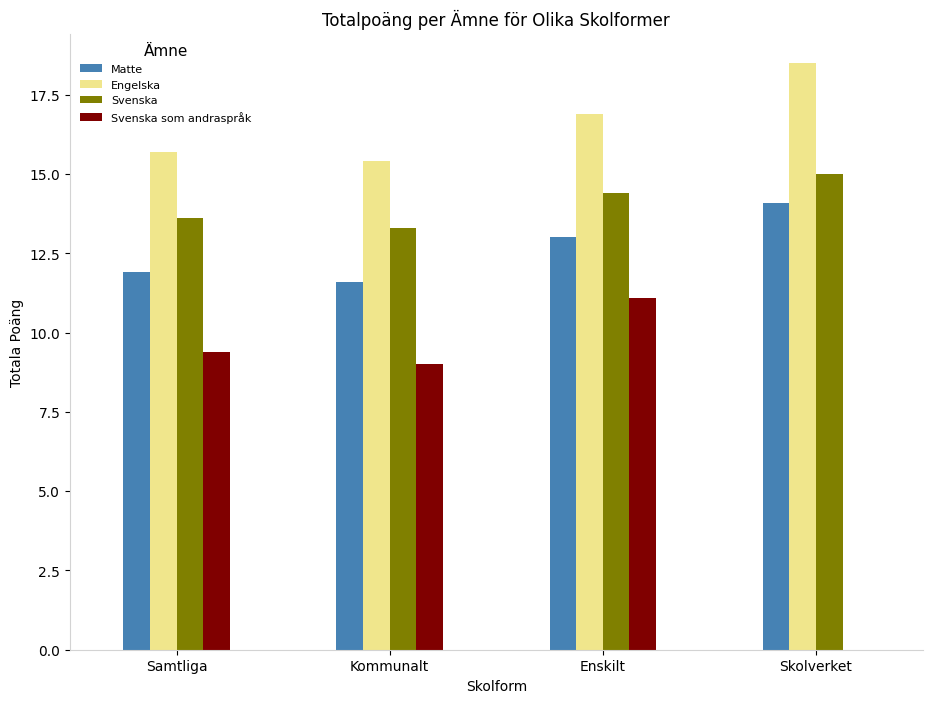

In [48]:
combined_cleaned.index = ['Samtliga', 'Kommunalt', 'Enskilt', 'Skolverket'] # Set new index for dataframe


colors = ['steelblue', 'khaki', 'olive', 'maroon'] # color palette for the bar plot

ax_combined = combined_cleaned.plot(kind='bar', figsize=(11, 8), color=colors) # plot the dataframe as a barchart

plt.title('Totalpoäng per Ämne för Olika Skolformer')
plt.xlabel('Skolform')
plt.ylabel('Totala Poäng')

plt.xticks(rotation=0) # rotate the x-axis tick labels 
plt.legend(title='Ämne', fontsize=8, loc='upper left', title_fontsize='11', frameon=False) # customize the legend

# remove some spines and change clolor on the ones that are left
ax_combined.spines['top'].set_visible(False)
ax_combined.spines['right'].set_visible(False)
ax_combined.spines['bottom'].set_color('lightgray')
ax_combined.spines['left'].set_color('lightgray')

plt.show()